### Cocacola

1. Pobierz dane na temat sprzedaży CocaColi globalnie w latach 1993 - 2023

2. Oceń dane, sprawdź brakujące dane, uzupełnij braki

3. Stwórz wykres danych

4. Stwórz prognozę sprzedaży CocaCola na rok 2024, 2025 a potem na 2026



/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


None


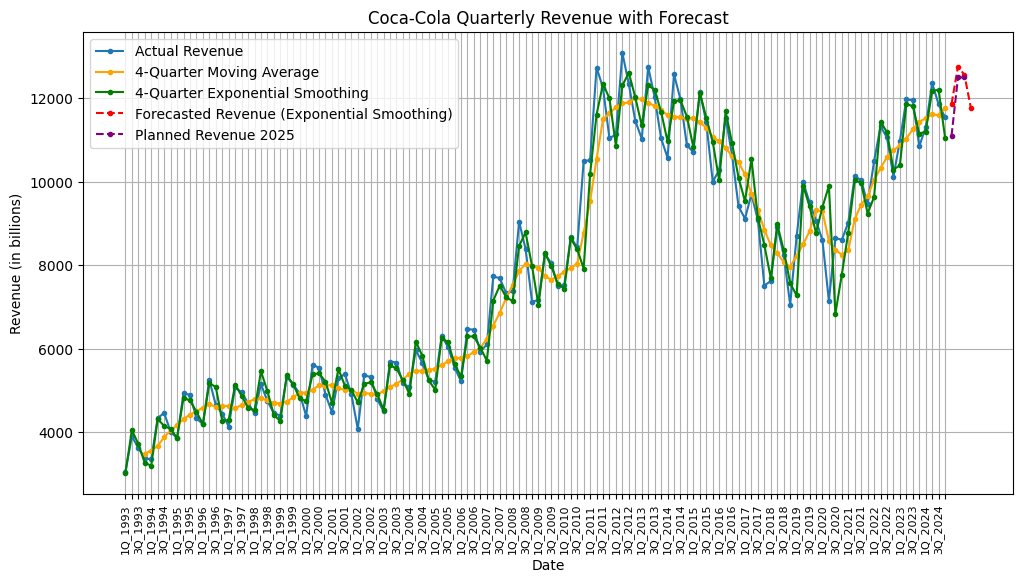

In [53]:
import pandas as pd
from datetime import datetime as dt, timedelta
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

data = pd.read_excel('COCACOLA_REVENUE.xlsx')

# Usuwam niepotrzebne kolumny
data = data.drop(columns=['Gross profit'], axis=1)
data = data.drop(columns=['Net income'], axis=1)

def parse_date(str):
    # problem mieliśmy w tym miejscu, w naszym pliku excel data była zapisana w formacie dziesiętnym, dodatkowo każdy kwartał kończył się 31 dniem miesiąca, co powodowało błąd przy parsowaniu daty
    # zakładam, że ostatni dzień miesiąca to 28, aby uniknąć błędu
    d = dt.strptime(str.replace('31', '28'), "%Y.%m.%d")
    return d


# ustawiam poprawne daty dla końca kwartału
data['datetime'] = data['Time'].apply(parse_date)
# dodaje pole z kwartałem w czytelnej formie 1Q_2023
data['quarter'] = data['datetime'].dt.quarter.astype(str) + "Q_" + data['datetime'].dt.year.astype(str)

data = data.set_index('datetime') # ustawiam datę końca kwartału jako index

# Dodajemy nasz model wygładzania wykładniczego
exponential_smoothing = ExponentialSmoothing(data['NET OPERATING REVENUES'], trend='add', seasonal='add', seasonal_periods=4).fit()
data['EMA_4'] = exponential_smoothing.fittedvalues
forecast = exponential_smoothing.forecast(4)

# Przygotowuję index dla nowych dat z 2025 r.
forecast_indices = [data.index[-1] + timedelta(days=91 * (i + 1)) for i in range(len(forecast))]
# Przygotowuję oznaczenia kwartałów dla forecastu 1Q_2025, 2Q_2025, ...
forecast_quarters = [f"{(i % 4) + 1}Q_{2025 + (i // 4)}" for i in range(len(forecast))]

# tworzę dataframe dla forecastu
forcast_data = pd.DataFrame({
    'quarter': forecast_quarters,
    'NET OPERATING REVENUES': [np.nan] * len(forecast),
    'EMA_4': forecast.values
}, index=forecast_indices)


# tworzę dataframe dla aktualnych danych z 2025 r., mamy na razie dane o sprzedaży za 3 kwartały
# Dane z google
actual_data = pd.DataFrame({
    'quarter': ['1Q_2025', '2Q_2025', '3Q_2025', '4Q_2025'],
    'NET OPERATING REVENUES': [11100, 12500, 12500, np.nan],
    'EMA_4': [np.nan] * len(forecast)
}, index=forecast_indices) # tutaj można użyć tego samego indexu co dla forecastu


# Podaję średnią kroczącą dla pełnego zestawu danych
simple_moving_avg = data['NET OPERATING REVENUES'].rolling(window=4).mean()


# Ustawiam etykiety dla ticków na osi X – żeby ładnie wyglądał podział na kwartały a jednocześnie ustawiam tick co drugi kwartał, żeby nie było ich za dużo
ticks_labels = list(map(lambda x : data['quarter'].iloc[x] if x % 2 == 0 else '', range(len(data['quarter']))))


print(data.index.inferred_freq)

# Dalej to już tylko rysowanie wykresu

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['quarter'], data['NET OPERATING REVENUES'], marker='.', label='Actual Revenue')
ax.plot(data['quarter'], simple_moving_avg, marker='.', color='orange', label='4-Quarter Moving Average')
ax.plot(data['quarter'], data['EMA_4'], marker='.', color='green', label='4-Quarter Exponential Smoothing')
ax.plot(forcast_data['quarter'], forcast_data['EMA_4'], marker='.', color='red', linestyle='--', label='Forecasted Revenue (Exponential Smoothing)')
ax.plot(actual_data['quarter'], actual_data['NET OPERATING REVENUES'], marker='.', color='purple', linestyle='--', label='Planned Revenue 2025')
ax.legend()
ax.set_title('Coca-Cola Quarterly Revenue with Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue (in billions)')
ax.grid(True)
ax.set_xticks(data['quarter'])
ax.set_xticklabels(ticks_labels, rotation=90, fontsize=8)
# plt.tight_layout()
plt.show()


/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipykernel_86816/2795990207.py:37: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(smoothing_level=0.3, smoothing_slope=0.1, smoothing_seasonal=0.1)
/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/media/server/EXPONENTIAL_SMOOTHING/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in

None


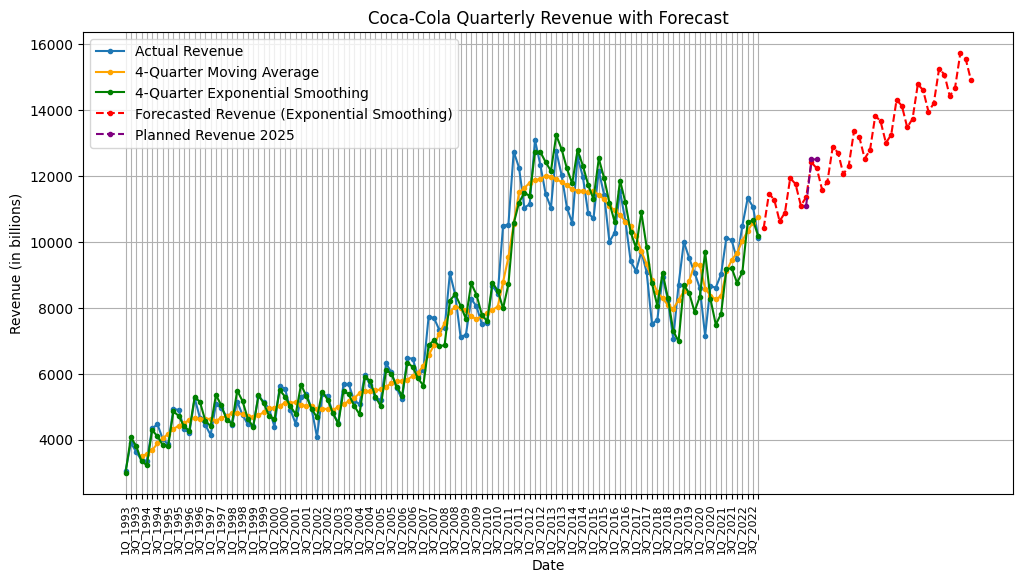

In [58]:
data = pd.read_excel("COCACOLA_REVENUE.xlsx")

# Usuwam niepotrzebne kolumny
data = data.drop(columns=["Gross profit"], axis=1)
data = data.drop(columns=["Net income"], axis=1)


def parse_date(str):
    # problem mieliśmy w tym miejscu, w naszym pliku excel data była zapisana w formacie dziesiętnym, dodatkowo każdy kwartał kończył się 31 dniem miesiąca, co powodowało błąd przy parsowaniu daty
    # zakładam, że ostatni dzień miesiąca to 28, aby uniknąć błędu
    d = dt.strptime(str.replace("31", "28"), "%Y.%m.%d")
    return d


# ustawiam poprawne daty dla końca kwartału
data["datetime"] = data["Time"].apply(parse_date)
# dodaje pole z kwartałem w czytelnej formie 1Q_2023
data["quarter"] = (
    data["datetime"].dt.quarter.astype(str)
    + "Q_"
    + data["datetime"].dt.year.astype(str)
)

data = data.set_index("datetime")  # ustawiam datę końca kwartału jako index


data = data[
    data.index < dt(2023, 1, 1)
]  # usuwam dane z 2025 roku, aby zrobić forecast na ich podstawie

# Dodajemy nasz model wygładzania wykładniczego
exponential_smoothing = ExponentialSmoothing(
    data["NET OPERATING REVENUES"],
    trend="add",
    seasonal="add",
    seasonal_periods=4,
).fit(smoothing_level=0.3, smoothing_slope=0.1, smoothing_seasonal=0.1)
data["EMA_4"] = exponential_smoothing.fittedvalues
forecast = exponential_smoothing.forecast(4 * 10)

# Przygotowuję index dla nowych dat z 2025 r.
forecast_indices = [
    data.index[-1] + timedelta(days=91 * (i + 1)) for i in range(len(forecast))
]
# Przygotowuję oznaczenia kwartałów dla forecastu 1Q_2025, 2Q_2025, ...
forecast_quarters = [f"{(i % 4) + 1}Q_{2023 + (i // 4)}" for i in range(len(forecast))]

# tworzę dataframe dla forecastu
forcast_data = pd.DataFrame(
    {
        "quarter": forecast_quarters,
        "NET OPERATING REVENUES": [np.nan] * len(forecast),
        "EMA_4": forecast.values,
    },
    index=forecast_indices,
)


# tworzę dataframe dla aktualnych danych z 2025 r., mamy na razie dane o sprzedaży za 3 kwartały
# Dane z google
actual_data = pd.DataFrame(
    {
        "quarter": ["1Q_2025", "2Q_2025", "3Q_2025", "4Q_2025"],
        "NET OPERATING REVENUES": [11100, 12500, 12500, np.nan],
        "EMA_4": [np.nan] * 4,
    },
    index=forecast_indices[-4:],
)  # tutaj można użyć tego samego indexu co dla forecastu


# Podaję średnią kroczącą dla pełnego zestawu danych
simple_moving_avg = data["NET OPERATING REVENUES"].rolling(window=4).mean()


# Ustawiam etykiety dla ticków na osi X – żeby ładnie wyglądał podział na kwartały a jednocześnie ustawiam tick co drugi kwartał, żeby nie było ich za dużo
ticks_labels = list(
    map(
        lambda x: data["quarter"].iloc[x] if x % 2 == 0 else "",
        range(len(data["quarter"])),
    )
)


print(data.index.inferred_freq)

# Dalej to już tylko rysowanie wykresu

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    data["quarter"], data["NET OPERATING REVENUES"], marker=".", label="Actual Revenue"
)
ax.plot(
    data["quarter"],
    simple_moving_avg,
    marker=".",
    color="orange",
    label="4-Quarter Moving Average",
)
ax.plot(
    data["quarter"],
    data["EMA_4"],
    marker=".",
    color="green",
    label="4-Quarter Exponential Smoothing",
)
ax.plot(
    forcast_data["quarter"],
    forcast_data["EMA_4"],
    marker=".",
    color="red",
    linestyle="--",
    label="Forecasted Revenue (Exponential Smoothing)",
)
ax.plot(
    actual_data["quarter"],
    actual_data["NET OPERATING REVENUES"],
    marker=".",
    color="purple",
    linestyle="--",
    label="Planned Revenue 2025",
)
ax.legend()
ax.set_title("Coca-Cola Quarterly Revenue with Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Revenue (in billions)")
ax.grid(True)
ax.set_xticks(data["quarter"])
ax.set_xticklabels(ticks_labels, rotation=90, fontsize=8)
# plt.tight_layout()
plt.show()